In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [62]:
import matplotlib.pyplot as plt
import random
#from tensorflow.examples.tutorials.mnist import input_data
#https://github.com/tensorflow/tensorflow
# 파이썬 설치폴더 -> lib/site-packages/tensorflow_core
# /examples에 복사
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [118]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
#트레이닝데이터, 테스트데이터

In [119]:
xtrain.shape
ytrain.shape

(60000,)

In [120]:
print(xtrain[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [121]:
#훈련셋 검증셋 분리
xval=xtrain[50000:]
yval=ytrain[50000:]
xtrain=xtrain[:50000]
ytrain=ytrain[:50000]

In [122]:
ytrain[0]

5

In [123]:
xtrain=xtrain.reshape(50000,784).astype('float32')/255.0
xval=xval.reshape(10000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0

0

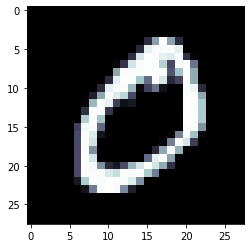

In [124]:
plt.imshow(xtrain[1].reshape(28,28),plt.cm.bone)
ytrain[1]

In [109]:
trainRandIdx=np.random.choice(50000,700)
valRandIdx=np.random.choice(10000,300)

In [125]:
xtrain=xtrain[trainRandIdx]
ytrain=ytrain[trainRandIdx]
xval=xval[valRandIdx]
yval=yval[valRandIdx]

In [126]:
yval.shape

(300,)

In [127]:
# 합/불 모델 : 0 or 1
#     0
#     1

# 1:조류, 2:파충류, 3:양서류, 4:포유류, 5:갑각류
#                     =>분류기 5개
                    
                    
#        조류분류, 파충류분류, 양서분류   포유류분류 갑각류분류
# softmax   0.5        0.2         0.1    0.2        0
# 참새       1          0          0       0        0
                    


In [128]:
#원핫인코딩
ytrain=np_utils.to_categorical(ytrain)
yval=np_utils.to_categorical(yval)
ytest=np_utils.to_categorical(ytest)

In [131]:
ytrain.shape

(700, 10)

In [132]:
#2. 모델 구성,    입력계층 히든계층 출력계층
model=Sequential()
model.add(Dense(units=2, input_dim=28*28, 
                       activation='relu')) #레이어 설계
#입력:784, 출력:2인 레이어 추가(add)
model.add(Dense(units=10, activation='softmax'))

In [133]:
## 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
              metrics=['accuracy']              
             )
#keras.io

In [134]:
#4)모델 학습시키기
hist=model.fit(xtrain, ytrain, batch_size=10,
               epochs=1000, 
               validation_data=(xval,yval))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 127us/sample - loss: 2.2800 - acc: 0.1857 - val_loss: 2.2329 - val_acc: 0.1533
Epoch 2/1000
700/700 [==============================] - 0s 76us/sample - loss: 2.2213 - acc: 0.1829 - val_loss: 2.1724 - val_acc: 0.1767
Epoch 3/1000
700/700 [==============================] - 0s 73us/sample - loss: 2.1739 - acc: 0.1843 - val_loss: 2.1300 - val_acc: 0.1900
Epoch 4/1000
700/700 [==============================] - 0s 73us/sample - loss: 2.1408 - acc: 0.1900 - val_loss: 2.0992 - val_acc: 0.1967
Epoch 5/1000
700/700 [==============================] - 0s 73us/sample - loss: 2.1146 - acc: 0.2086 - val_loss: 2.0781 - val_acc: 0.2100
Epoch 6/1000
700/700 [==============================] - 0s 76us/sample - loss: 2.0941 - acc: 0.2143 - val_loss: 2.0621 - val_acc: 0.2267
Epoch 7/1000
700/700 [==============================] - 0s 85us/sample - loss: 2.0765 - acc: 0.2343 - val_loss: 2.0474 - val_acc: 0

700/700 [==============================] - 0s 68us/sample - loss: 1.3486 - acc: 0.4971 - val_loss: 1.4610 - val_acc: 0.4833
Epoch 61/1000
700/700 [==============================] - 0s 74us/sample - loss: 1.3406 - acc: 0.4943 - val_loss: 1.4631 - val_acc: 0.4733
Epoch 62/1000
700/700 [==============================] - 0s 70us/sample - loss: 1.3386 - acc: 0.4971 - val_loss: 1.4556 - val_acc: 0.4800
Epoch 63/1000
700/700 [==============================] - 0s 67us/sample - loss: 1.3327 - acc: 0.5086 - val_loss: 1.4550 - val_acc: 0.4767
Epoch 64/1000
700/700 [==============================] - 0s 67us/sample - loss: 1.3272 - acc: 0.5071 - val_loss: 1.4568 - val_acc: 0.4767
Epoch 65/1000
700/700 [==============================] - 0s 67us/sample - loss: 1.3227 - acc: 0.4971 - val_loss: 1.4505 - val_acc: 0.4800
Epoch 66/1000
700/700 [==============================] - 0s 73us/sample - loss: 1.3178 - acc: 0.5100 - val_loss: 1.4494 - val_acc: 0.4767
Epoch 67/1000
700/700 [=========================

700/700 [==============================] - 0s 73us/sample - loss: 1.1378 - acc: 0.5929 - val_loss: 1.4067 - val_acc: 0.5067
Epoch 120/1000
700/700 [==============================] - 0s 73us/sample - loss: 1.1364 - acc: 0.5900 - val_loss: 1.4125 - val_acc: 0.5133
Epoch 121/1000
700/700 [==============================] - 0s 71us/sample - loss: 1.1328 - acc: 0.6014 - val_loss: 1.4092 - val_acc: 0.4767
Epoch 122/1000
700/700 [==============================] - 0s 73us/sample - loss: 1.1314 - acc: 0.5914 - val_loss: 1.4107 - val_acc: 0.4967
Epoch 123/1000
700/700 [==============================] - 0s 74us/sample - loss: 1.1282 - acc: 0.5857 - val_loss: 1.4087 - val_acc: 0.4800
Epoch 124/1000
700/700 [==============================] - 0s 74us/sample - loss: 1.1268 - acc: 0.5957 - val_loss: 1.4076 - val_acc: 0.5100
Epoch 125/1000
700/700 [==============================] - 0s 71us/sample - loss: 1.1232 - acc: 0.5986 - val_loss: 1.4047 - val_acc: 0.5000
Epoch 126/1000
700/700 [==================

700/700 [==============================] - 0s 76us/sample - loss: 1.0243 - acc: 0.6400 - val_loss: 1.4212 - val_acc: 0.5333
Epoch 179/1000
700/700 [==============================] - 0s 76us/sample - loss: 1.0230 - acc: 0.6414 - val_loss: 1.4207 - val_acc: 0.5200
Epoch 180/1000
700/700 [==============================] - 0s 76us/sample - loss: 1.0213 - acc: 0.6343 - val_loss: 1.4314 - val_acc: 0.5300
Epoch 181/1000
700/700 [==============================] - 0s 68us/sample - loss: 1.0187 - acc: 0.6357 - val_loss: 1.4251 - val_acc: 0.5267
Epoch 182/1000
700/700 [==============================] - 0s 76us/sample - loss: 1.0165 - acc: 0.6457 - val_loss: 1.4266 - val_acc: 0.5267
Epoch 183/1000
700/700 [==============================] - 0s 83us/sample - loss: 1.0156 - acc: 0.6386 - val_loss: 1.4294 - val_acc: 0.5233
Epoch 184/1000
700/700 [==============================] - 0s 118us/sample - loss: 1.0130 - acc: 0.6429 - val_loss: 1.4267 - val_acc: 0.5200
Epoch 185/1000
700/700 [=================

700/700 [==============================] - 0s 71us/sample - loss: 0.9405 - acc: 0.6729 - val_loss: 1.4491 - val_acc: 0.5200
Epoch 238/1000
700/700 [==============================] - 0s 77us/sample - loss: 0.9394 - acc: 0.6757 - val_loss: 1.4509 - val_acc: 0.5267
Epoch 239/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.9379 - acc: 0.6700 - val_loss: 1.4604 - val_acc: 0.5200
Epoch 240/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.9367 - acc: 0.6729 - val_loss: 1.4483 - val_acc: 0.5167
Epoch 241/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.9358 - acc: 0.6757 - val_loss: 1.4596 - val_acc: 0.5200
Epoch 242/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.9340 - acc: 0.6729 - val_loss: 1.4560 - val_acc: 0.5233
Epoch 243/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.9329 - acc: 0.6714 - val_loss: 1.4582 - val_acc: 0.5200
Epoch 244/1000
700/700 [==================

700/700 [==============================] - 0s 68us/sample - loss: 0.8818 - acc: 0.6814 - val_loss: 1.4940 - val_acc: 0.5167
Epoch 297/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.8802 - acc: 0.6871 - val_loss: 1.5162 - val_acc: 0.5200
Epoch 298/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.8816 - acc: 0.6814 - val_loss: 1.5057 - val_acc: 0.5200
Epoch 299/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.8802 - acc: 0.6829 - val_loss: 1.5028 - val_acc: 0.5167
Epoch 300/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.8792 - acc: 0.6857 - val_loss: 1.5020 - val_acc: 0.5167
Epoch 301/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.8777 - acc: 0.6800 - val_loss: 1.5017 - val_acc: 0.5200
Epoch 302/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.8760 - acc: 0.6829 - val_loss: 1.5018 - val_acc: 0.5167
Epoch 303/1000
700/700 [==================

Epoch 355/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.8386 - acc: 0.6871 - val_loss: 1.5470 - val_acc: 0.5233
Epoch 356/1000
700/700 [==============================] - 0s 81us/sample - loss: 0.8374 - acc: 0.6943 - val_loss: 1.5617 - val_acc: 0.5100
Epoch 357/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.8376 - acc: 0.6957 - val_loss: 1.5710 - val_acc: 0.5167
Epoch 358/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.8386 - acc: 0.6886 - val_loss: 1.5616 - val_acc: 0.5167
Epoch 359/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.8363 - acc: 0.6914 - val_loss: 1.5535 - val_acc: 0.5100
Epoch 360/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.8355 - acc: 0.7000 - val_loss: 1.5530 - val_acc: 0.5200
Epoch 361/1000
700/700 [==============================] - 0s 67us/sample - loss: 0.8353 - acc: 0.6900 - val_loss: 1.5803 - val_acc: 0.5133
Epoch 362/1000
700/700 [===

Epoch 414/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.7992 - acc: 0.6986 - val_loss: 1.6105 - val_acc: 0.5167
Epoch 415/1000
700/700 [==============================] - 0s 90us/sample - loss: 0.7981 - acc: 0.6986 - val_loss: 1.6057 - val_acc: 0.5233
Epoch 416/1000
700/700 [==============================] - 0s 80us/sample - loss: 0.7979 - acc: 0.7000 - val_loss: 1.6032 - val_acc: 0.5233
Epoch 417/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7977 - acc: 0.7057 - val_loss: 1.6022 - val_acc: 0.5200
Epoch 418/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.7969 - acc: 0.6971 - val_loss: 1.6271 - val_acc: 0.5133
Epoch 419/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7962 - acc: 0.6971 - val_loss: 1.6137 - val_acc: 0.5133
Epoch 420/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7947 - acc: 0.7057 - val_loss: 1.6304 - val_acc: 0.5133
Epoch 421/1000
700/700 [===

Epoch 473/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7673 - acc: 0.7186 - val_loss: 1.6746 - val_acc: 0.5167
Epoch 474/1000
700/700 [==============================] - 0s 80us/sample - loss: 0.7668 - acc: 0.7114 - val_loss: 1.6749 - val_acc: 0.5100
Epoch 475/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7672 - acc: 0.7129 - val_loss: 1.6668 - val_acc: 0.5167
Epoch 476/1000
700/700 [==============================] - 0s 67us/sample - loss: 0.7667 - acc: 0.7143 - val_loss: 1.6777 - val_acc: 0.5133
Epoch 477/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.7656 - acc: 0.7143 - val_loss: 1.6923 - val_acc: 0.5167
Epoch 478/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.7662 - acc: 0.7100 - val_loss: 1.6713 - val_acc: 0.5167
Epoch 479/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.7653 - acc: 0.7129 - val_loss: 1.6734 - val_acc: 0.5133
Epoch 480/1000
700/700 [===

Epoch 532/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.7428 - acc: 0.7171 - val_loss: 1.7533 - val_acc: 0.5133
Epoch 533/1000
700/700 [==============================] - 0s 67us/sample - loss: 0.7418 - acc: 0.7257 - val_loss: 1.7471 - val_acc: 0.5200
Epoch 534/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.7434 - acc: 0.7143 - val_loss: 1.7191 - val_acc: 0.5100
Epoch 535/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.7416 - acc: 0.7186 - val_loss: 1.7355 - val_acc: 0.5133
Epoch 536/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.7413 - acc: 0.7171 - val_loss: 1.7373 - val_acc: 0.5133
Epoch 537/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7407 - acc: 0.7214 - val_loss: 1.7440 - val_acc: 0.5200
Epoch 538/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.7404 - acc: 0.7200 - val_loss: 1.7545 - val_acc: 0.5200
Epoch 539/1000
700/700 [===

Epoch 591/1000
700/700 [==============================] - 0s 78us/sample - loss: 0.7211 - acc: 0.7286 - val_loss: 1.7796 - val_acc: 0.5100
Epoch 592/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7218 - acc: 0.7257 - val_loss: 1.7896 - val_acc: 0.5100
Epoch 593/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.7219 - acc: 0.7314 - val_loss: 1.8008 - val_acc: 0.5100
Epoch 594/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7218 - acc: 0.7257 - val_loss: 1.7905 - val_acc: 0.5133
Epoch 595/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7203 - acc: 0.7271 - val_loss: 1.8055 - val_acc: 0.5100
Epoch 596/1000
700/700 [==============================] - 0s 67us/sample - loss: 0.7210 - acc: 0.7257 - val_loss: 1.8228 - val_acc: 0.5067
Epoch 597/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.7206 - acc: 0.7257 - val_loss: 1.8028 - val_acc: 0.5133
Epoch 598/1000
700/700 [===

Epoch 650/1000
700/700 [==============================] - 0s 78us/sample - loss: 0.7041 - acc: 0.7329 - val_loss: 1.8370 - val_acc: 0.5100
Epoch 651/1000
700/700 [==============================] - 0s 81us/sample - loss: 0.7051 - acc: 0.7357 - val_loss: 1.8501 - val_acc: 0.4967
Epoch 652/1000
700/700 [==============================] - 0s 77us/sample - loss: 0.7043 - acc: 0.7329 - val_loss: 1.8533 - val_acc: 0.5067
Epoch 653/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.7034 - acc: 0.7343 - val_loss: 1.8699 - val_acc: 0.5067
Epoch 654/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.7043 - acc: 0.7314 - val_loss: 1.8667 - val_acc: 0.5033
Epoch 655/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.7038 - acc: 0.7300 - val_loss: 1.8607 - val_acc: 0.5100
Epoch 656/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.7032 - acc: 0.7343 - val_loss: 1.8796 - val_acc: 0.5067
Epoch 657/1000
700/700 [===

Epoch 709/1000
700/700 [==============================] - 0s 77us/sample - loss: 0.6855 - acc: 0.7457 - val_loss: 1.9018 - val_acc: 0.5100
Epoch 710/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6864 - acc: 0.7414 - val_loss: 1.9270 - val_acc: 0.5167
Epoch 711/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.6856 - acc: 0.7443 - val_loss: 1.9276 - val_acc: 0.5167
Epoch 712/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.6862 - acc: 0.7429 - val_loss: 1.9235 - val_acc: 0.5100
Epoch 713/1000
700/700 [==============================] - 0s 84us/sample - loss: 0.6850 - acc: 0.7429 - val_loss: 1.9353 - val_acc: 0.5100
Epoch 714/1000
700/700 [==============================] - 0s 105us/sample - loss: 0.6850 - acc: 0.7429 - val_loss: 1.9272 - val_acc: 0.5100
Epoch 715/1000
700/700 [==============================] - 0s 120us/sample - loss: 0.6851 - acc: 0.7414 - val_loss: 1.9130 - val_acc: 0.5200
Epoch 716/1000
700/700 [=

Epoch 768/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6703 - acc: 0.7500 - val_loss: 1.9761 - val_acc: 0.5067
Epoch 769/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6703 - acc: 0.7471 - val_loss: 1.9588 - val_acc: 0.4967
Epoch 770/1000
700/700 [==============================] - 0s 78us/sample - loss: 0.6702 - acc: 0.7500 - val_loss: 1.9860 - val_acc: 0.5000
Epoch 771/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6698 - acc: 0.7457 - val_loss: 1.9669 - val_acc: 0.4967
Epoch 772/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.6697 - acc: 0.7500 - val_loss: 1.9983 - val_acc: 0.5000
Epoch 773/1000
700/700 [==============================] - 0s 81us/sample - loss: 0.6696 - acc: 0.7514 - val_loss: 1.9917 - val_acc: 0.5067
Epoch 774/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6695 - acc: 0.7486 - val_loss: 1.9806 - val_acc: 0.5067
Epoch 775/1000
700/700 [===

Epoch 827/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6577 - acc: 0.7514 - val_loss: 2.0246 - val_acc: 0.4967
Epoch 828/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.6564 - acc: 0.7557 - val_loss: 2.0754 - val_acc: 0.4967
Epoch 829/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.6570 - acc: 0.7514 - val_loss: 2.0614 - val_acc: 0.5033
Epoch 830/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.6557 - acc: 0.7557 - val_loss: 2.0638 - val_acc: 0.5000
Epoch 831/1000
700/700 [==============================] - 0s 81us/sample - loss: 0.6565 - acc: 0.7543 - val_loss: 2.0737 - val_acc: 0.5000
Epoch 832/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6559 - acc: 0.7529 - val_loss: 2.0378 - val_acc: 0.4933
Epoch 833/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6563 - acc: 0.7586 - val_loss: 2.0606 - val_acc: 0.4900
Epoch 834/1000
700/700 [===

Epoch 886/1000
700/700 [==============================] - 0s 95us/sample - loss: 0.6456 - acc: 0.7629 - val_loss: 2.1080 - val_acc: 0.4967
Epoch 887/1000
700/700 [==============================] - 0s 85us/sample - loss: 0.6456 - acc: 0.7571 - val_loss: 2.1126 - val_acc: 0.4967
Epoch 888/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.6448 - acc: 0.7586 - val_loss: 2.1077 - val_acc: 0.4933
Epoch 889/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6448 - acc: 0.7586 - val_loss: 2.1170 - val_acc: 0.4967
Epoch 890/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6450 - acc: 0.7586 - val_loss: 2.1295 - val_acc: 0.4967
Epoch 891/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.6451 - acc: 0.7586 - val_loss: 2.1182 - val_acc: 0.4967
Epoch 892/1000
700/700 [==============================] - 0s 74us/sample - loss: 0.6449 - acc: 0.7586 - val_loss: 2.0949 - val_acc: 0.4933
Epoch 893/1000
700/700 [===

Epoch 945/1000
700/700 [==============================] - 0s 100us/sample - loss: 0.6347 - acc: 0.7600 - val_loss: 2.1980 - val_acc: 0.4967
Epoch 946/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.6346 - acc: 0.7586 - val_loss: 2.1716 - val_acc: 0.4900
Epoch 947/1000
700/700 [==============================] - 0s 73us/sample - loss: 0.6347 - acc: 0.7629 - val_loss: 2.1755 - val_acc: 0.4933
Epoch 948/1000
700/700 [==============================] - 0s 71us/sample - loss: 0.6353 - acc: 0.7600 - val_loss: 2.1826 - val_acc: 0.4967
Epoch 949/1000
700/700 [==============================] - 0s 70us/sample - loss: 0.6339 - acc: 0.7643 - val_loss: 2.1737 - val_acc: 0.4967
Epoch 950/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6341 - acc: 0.7614 - val_loss: 2.1957 - val_acc: 0.4967
Epoch 951/1000
700/700 [==============================] - 0s 68us/sample - loss: 0.6337 - acc: 0.7629 - val_loss: 2.1830 - val_acc: 0.4967
Epoch 952/1000
700/700 [==

In [ ]:
#케라스 코딩 과정
"""
1)데이터셋 생성(훈련/검증/시험 생성)
2)모델 구성(Sequential(간단한 모델), 함수API(복잡한 모델))
3)모델 학습과정 설정(cost함수, 옵티마이저정의)-compile함수
4)모델 학습시키기(train data)-fit함수
5)학습과정 확인(훈련셋/검증셋 cost, 정확도 측정)->모델
6)모델 평가(test data)-evalute함수
7)모델 사용-predict함수

참고: 콜백함수:어떤 상태가 되었을 때, 사전에 지정한
함수가 호출됨.
ex) 와이파이 켬 -> 이동 -> 와이파이 검색 되었을 때,
사전에 지정한 함수가 호출됨=> 화면에 "와이파이가 검색됐어요"

콜백함수:모델을 학습하다가 더 이상 좋아지지 않으면(상태)
모델링 중단 하도록 함.

"""

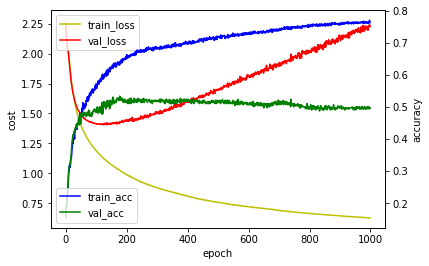

In [136]:
#학습 결과 출력(시각화)
fig, axes=plt.subplots()
accax=axes.twinx()
axes.plot(hist.history['loss'], 'y', label="train_loss")
axes.plot(hist.history['val_loss'], 'r', label="val_loss")
accax.plot(hist.history['acc'], 'b', label="train_acc")
accax.plot(hist.history['val_acc'], 'g', label="val_acc")
axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc="upper left")
accax.legend(loc="lower left")
plt.show()

In [137]:
#1. 데이터생성
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

In [138]:
#2. 모델 구성
model=Sequential()
model.add(Dense(units=2, input_dim=28*28, 
                       activation='relu')) #레이어 설계
model.add(Dense(units=10, activation='softmax'))

In [140]:
#3. 모델 학습과정 설정, 학습
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
              metrics=['accuracy']              
             )
hist=model.fit(xtrain, ytrain, batch_size=32,
               epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1798 - acc: 0.5550
Epoch 2/50
60000/60000 [==============================] - 1s 19us/sample - loss: 1.1493 - acc: 0.5696
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.1295 - acc: 0.5820
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.1148 - acc: 0.5967
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1019 - acc: 0.6124
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.0885 - acc: 0.6301
Epoch 7/50
60000/60000 [==============================] - 1s 19us/sample - loss: 1.0743 - acc: 0.6472
Epoch 8/50
60000/60000 [==============================] - 1s 19us/sample - loss: 1.0627 - acc: 0.6583
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.0525 - acc: 0.6666
Epoch 10/50
60000/60000 [==============================] - 

[0.5550167, 0.5696, 0.5819833, 0.5967, 0.6123833, 0.63013333, 0.6472333, 0.65835, 0.66658336, 0.67183334, 0.6778, 0.68046665, 0.68406665, 0.68701667, 0.6867667, 0.6905, 0.6910167, 0.6926, 0.6935833, 0.69441664, 0.6953833, 0.69731665, 0.69685, 0.69783336, 0.6989167, 0.6989667, 0.6990833, 0.69945, 0.70016664, 0.70196664, 0.7016, 0.70241666, 0.70108336, 0.7037333, 0.70225, 0.7030333, 0.7035, 0.70353335, 0.70418334, 0.70416665, 0.70458335, 0.7050667, 0.70625, 0.70423335, 0.7061333, 0.7054167, 0.70685, 0.70628333, 0.70645, 0.7080167]


In [144]:
#print(hist.history['acc']) #loss
#모델 평가하기
model.evaluate(xtest, ytest, batch_size=32)
#[cost, accuracy]

[0.9865045686721802, 0.705]

In [159]:
#모델 사용하기(분류)

yhat=model.predict(xtest[0:1])
np.sum(yhat[0])#1.0
np.max(yhat[0])#0.69
np.argmax(yhat[0])#7
#ytest[0:1] #7

7

In [160]:
# np.sum(yhat[0])
# np.max(yhat[0]) #0.69
# np.argmax(yhat[0])#7

In [161]:
(xtrain,ytrain),(xtest,ytest)=
tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


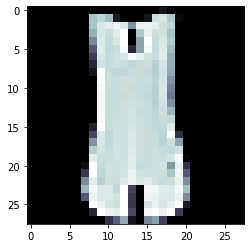

In [170]:
xtrain.shape
plt.imshow(xtrain[4], plt.cm.bone)

In [178]:
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0

In [173]:
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

In [193]:
model=Sequential()
model.add(Dense(units=256, input_dim=28*28, 
                       activation='relu')) #레이어 설계
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [194]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy']              
             )
hist=model.fit(xtrain, ytrain, batch_size=32,
               epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8004 - acc: 0.6992
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5371 - acc: 0.8025
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4698 - acc: 0.8289
Epoch 4/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4274 - acc: 0.8445
Epoch 5/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4033 - acc: 0.8513
Epoch 6/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3812 - acc: 0.8604
Epoch 7/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3637 - acc: 0.8667
Epoch 8/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3492 - acc: 0.8727
Epoch 9/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3358 - acc: 0.8763
Epoch 10/50
60000/60000 [==============================] - 

In [ ]:
#train -> 훈련 -> 모델
#test   ---------> 입력 -> 분류결과(yhat)
#                            정답(ytest)
#정확도? prediction

In [ ]:
#iris 데이터 분류기

In [195]:
import pandas as pd

In [197]:
df=pd.read_csv("iris.csv", names=['sepal_length','sepal_width', 
                                  'petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [198]:
import seaborn as sns

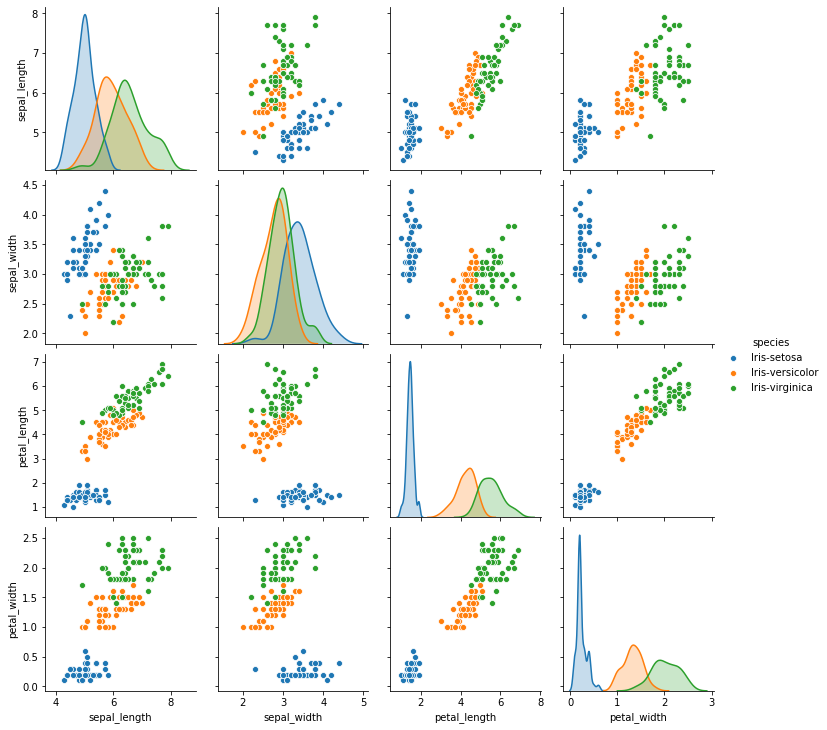

In [199]:
sns.pairplot(df, hue='species')
plt.show()

In [200]:
from sklearn.preprocessing import LabelEncoder

In [205]:
data=df.values #dataframe -> array
x=data[:,0:4].astype(float)

In [209]:
ydata=data[:,4]

le=LabelEncoder()
le.fit(ydata)
y=le.transform(ydata)

In [212]:
y=np_utils.to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0